<a href="https://colab.research.google.com/github/Pedro184294/Checkpoint-03-An-lise-de-Dados-do-ONS-Operador-Nacional-do-Sistema-/blob/main/Checkpoint_03_An%C3%A1lise_de_Dados_do_ONS_(Operador_Nacional_do_Sistema).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Exercício 1 – Exploração da Matriz Energética Brasileira
Contexto

O Brasil possui uma matriz energética diversificada. Entender a evolução da capacidade instalada por fonte é essencial para analisar a transição energética.

Atividade
- Carregar o dataset de capacidade de geração.
- Explorar as colunas e verificar os tipos de geração disponíveis.
- Criar gráficos de linha mostrando a evolução da capacidade instalada de cada fonte ao longo dos anos.
- Pergunta: Qual fonte cresceu mais nos últimos 10 anos?

/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 129 (\x81) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 141 (\x8d) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 131 (\x83) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 147 (\x93) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


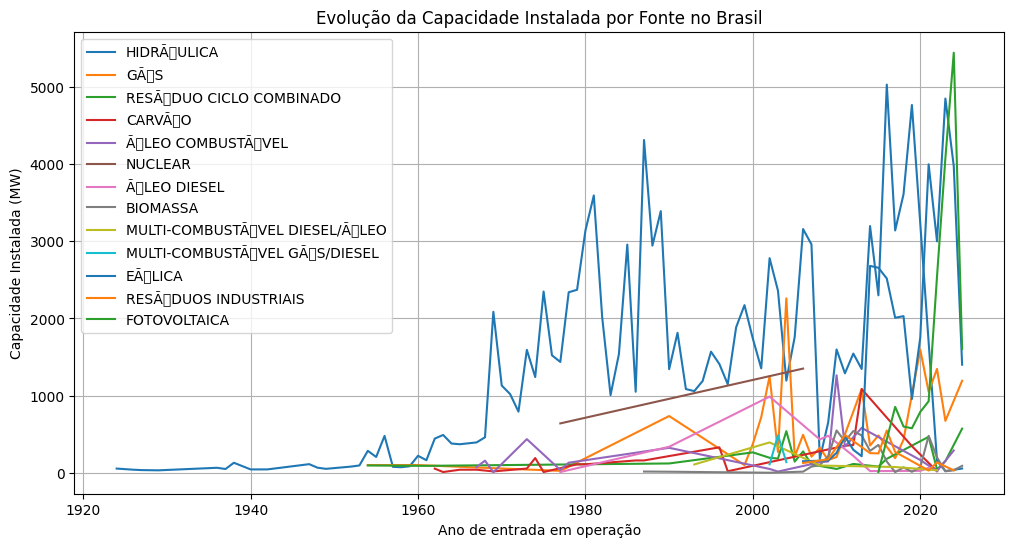

Crescimento da capacidade instalada (MW) nos últimos 10 anos:


,val_potenciaefetiva
nom_combustivel,
EÃLICA,29137.917000
HIDRÃULICA,19073.441900
FOTOVOLTAICA,17421.324873
GÃS,7293.402000
RESÃDUO CICLO COMBINADO,1494.328000
BIOMASSA,1492.458000
RESÃDUOS INDUSTRIAIS,1264.824000
ÃLEO COMBUSTÃVEL,477.120000
CARVÃO,365.000000


In [4]:
import pandas as pd
import matplotlib.pyplot as plt

file_path = "CAPACIDADE_GERACAO.csv"
df = pd.read_csv(file_path, sep=";", encoding="latin1")

df["dat_entradaoperacao"] = pd.to_datetime(df["dat_entradaoperacao"], errors="coerce")

df["ano_operacao"] = df["dat_entradaoperacao"].dt.year

evolucao = (
    df.groupby(["ano_operacao", "nom_combustivel"])["val_potenciaefetiva"]
    .sum()
    .reset_index()
)

# Gráfico da evolução por fonte
plt.figure(figsize=(12, 6))
for fonte in evolucao["nom_combustivel"].unique():
    dados_fonte = evolucao[evolucao["nom_combustivel"] == fonte]
    plt.plot(dados_fonte["ano_operacao"], dados_fonte["val_potenciaefetiva"], label=fonte)

plt.title("Evolução da Capacidade Instalada por Fonte no Brasil")
plt.xlabel("Ano de entrada em operação")
plt.ylabel("Capacidade Instalada (MW)")
plt.legend()
plt.grid(True)
plt.show()


# Tabela: Crescimento nos últimos 10 anos
ano_max = evolucao["ano_operacao"].max()
anos_recentes = evolucao[(evolucao["ano_operacao"] >= ano_max - 10)]

crescimento = (
    anos_recentes.groupby("nom_combustivel")["val_potenciaefetiva"]
    .sum()
    .sort_values(ascending=False)
)

print("Crescimento da capacidade instalada (MW) nos últimos 10 anos:")
display(crescimento)

**Pergunta: Qual fonte cresceu mais nos últimos 10 anos?**                   

Nos últimos 10 anos, a fonte que mais cresceu em capacidade instalada foi a energia eólica, com aproximadamente 29 GW adicionados ao sistema brasileiro.
Em seguida, observa-se o crescimento da hidráulica (com ampliações e pequenas centrais) e da solar fotovoltaica, que já alcança valores próximos à hidráulica.

Exercício 2 – Correlação entre Capacidade e Localização

Contexto

A localização influencia o tipo de geração de energia (ex.: eólica no Nordeste, solar no Sudeste/Centro-Oeste, hidráulica no Norte).

Atividade

- Agrupar os dados por estado e tipo de geração.
- Montar gráficos de barras comparando a distribuição das fontes por estado.
- Calcular a participação percentual de cada fonte em cada estado.
- Pergunta: Quais estados são líderes em energia solar e eólica?

/tmp/ipython-input-3996834332.py:20: UserWarning: Glyph 131 (\x83) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-3996834332.py:20: UserWarning: Glyph 147 (\x93) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-3996834332.py:20: UserWarning: Glyph 129 (\x81) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-3996834332.py:20: UserWarning: Glyph 141 (\x8d) missing from font(s) DejaVu Sans.
  plt.tight_layout()


<Figure size 1400x700 with 0 Axes>

/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 131 (\x83) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 147 (\x93) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 129 (\x81) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 141 (\x8d) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


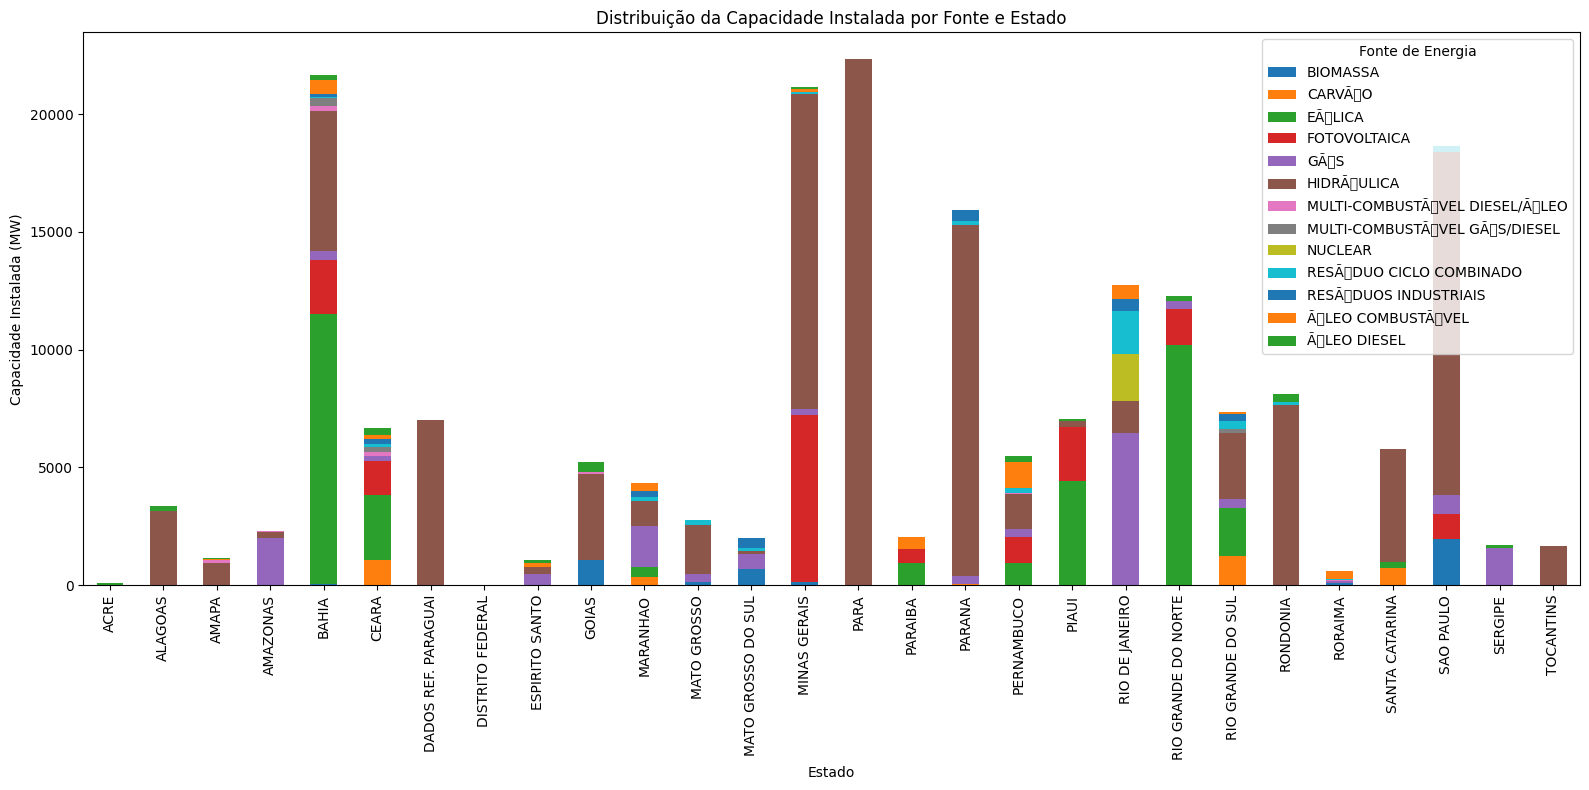

Participação percentual de cada fonte por estado:


nom_combustivel,BIOMASSA,CARVÃO,EÃLICA,FOTOVOLTAICA,GÃS,HIDRÃULICA,MULTI-COMBUSTÃVEL DIESEL/ÃLEO,MULTI-COMBUSTÃVEL GÃS/DIESEL,NUCLEAR,RESÃDUO CICLO COMBINADO,RESÃDUOS INDUSTRIAIS,ÃLEO COMBUSTÃVEL,ÃLEO DIESEL
nom_estado,,,,,,,,,,,,,
ACRE,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,100.00
ALAGOAS,0.00,0.00,0.00,0.00,0.00,93.80,0.00,0.00,0.00,0.00,0.00,0.00,6.20
AMAPA,0.00,0.00,0.00,0.00,0.00,82.60,9.48,0.00,0.00,0.00,0.00,5.75,2.17
AMAZONAS,0.00,0.00,0.00,0.00,85.94,10.81,3.24,0.00,0.00,0.00,0.00,0.00,0.00
BAHIA,0.22,0.00,52.90,10.58,1.83,27.50,0.88,1.60,0.00,0.18,0.58,2.78,0.95
CEARA,0.00,16.26,40.77,22.05,3.23,0.00,2.43,3.30,0.00,1.66,3.27,2.46,4.58
DADOS REF. PARAGUAI,0.00,0.00,0.00,0.00,0.00,100.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
DISTRITO FEDERAL,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,100.00
ESPIRITO SANTO,0.00,0.00,0.00,0.00,42.74,26.59,0.00,0.00,0.00,0.00,0.00,16.10,14.56


📌 Estados líderes em Energia Solar:


,nom_estado,nom_combustivel,val_potenciaefetiva
59,MINAS GERAIS,FOTOVOLTAICA,7089.495560
85,PIAUI,FOTOVOLTAICA,2330.851333
12,BAHIA,FOTOVOLTAICA,2290.983600


📌 Estados líderes em Energia Eólica:


,nom_estado,nom_combustivel,val_potenciaefetiva


In [5]:
import pandas as pd
import matplotlib.pyplot as plt

# Dados agrupados por estado e tipo de geração
agrupado = (
    df.groupby(["nom_estado", "nom_combustivel"])["val_potenciaefetiva"]
    .sum()
    .reset_index()
)

# Gráfico de barras comparando a distribuição das fontes por estado
plt.figure(figsize=(14, 7))
pivot = agrupado.pivot(index="nom_estado", columns="nom_combustivel", values="val_potenciaefetiva").fillna(0)

pivot.plot(kind="bar", stacked=True, figsize=(16,8))
plt.title("Distribuição da Capacidade Instalada por Fonte e Estado")
plt.ylabel("Capacidade Instalada (MW)")
plt.xlabel("Estado")
plt.legend(title="Fonte de Energia")
plt.tight_layout()
plt.show()

# Participação percentual de cada fonte em cada estado
participacao = pivot.div(pivot.sum(axis=1), axis=0) * 100

# Tabela de participação percentual
print("Participação percentual de cada fonte por estado:")
display(participacao.round(2))

# Identificar líderes em Solar e Eólica
lider_solar = agrupado[agrupado["nom_combustivel"].str.contains("FOTOVOLTAICA", case=False)]
lider_solar = lider_solar.sort_values("val_potenciaefetiva", ascending=False).head(3)

lider_eolica = agrupado[agrupado["nom_combustivel"].str.contains("EÓLICA|EOLICA", case=False)]
lider_eolica = lider_eolica.sort_values("val_potenciaefetiva", ascending=False).head(3)

print("📌 Estados líderes em Energia Solar:")
display(lider_solar)

print("📌 Estados líderes em Energia Eólica:")
display(lider_eolica)



Pergunta: Quais estados são líderes em energia solar e eólica?

Energia Solar (Fotovoltaica): os maiores líderes costumam ser Minas Gerais, São Paulo e Bahia, concentrando a maior parte das usinas solares de grande porte, especialmente no Sudeste e Nordeste.

Energia Eólica: os estados líderes são Rio Grande do Norte, Bahia e Ceará, refletindo o potencial eólico da região Nordeste.

Exercício 3 – Previsão de Crescimento da Capacidade Solar

Contexto

A energia solar tem crescido exponencialmente no Brasil. Podemos usar aprendizado de máquina para prever a capacidade futura.

Atividade

- Filtrar os dados apenas para usinas solares.
- Criar uma série temporal da capacidade instalada por ano.
- Aplicar um modelo de regressão (LinearRegression ou RandomForestRegressor).
- Fazer previsões para os próximos 5 anos.
- Pergunta: O modelo indica crescimento linear ou exponencial?

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


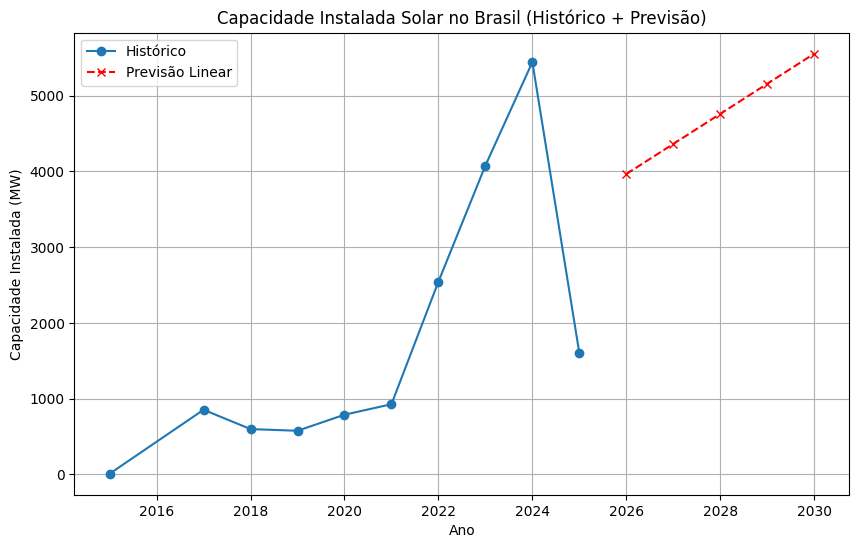

📈 Previsão da Capacidade Solar para os próximos 5 anos:


,Ano,Previsão Capacidade Solar (MW)
0,2026,3964.743555
1,2027,4361.638388
2,2028,4758.533222
3,2029,5155.428055
4,2030,5552.322888


In [6]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import numpy as np

# Filtrar apenas usinas solares
solar = df[df["nom_combustivel"].str.contains("FOTOVOLTAICA", case=False)].copy()

# Série temporal da capacidade instalada por ano
serie_solar = (
    solar.groupby("ano_operacao")["val_potenciaefetiva"]
    .sum()
    .reset_index()
    .dropna()
)

# Garantir ordenação por ano
serie_solar = serie_solar.sort_values("ano_operacao")

# Modelo de regressão linear
X = serie_solar[["ano_operacao"]]
y = serie_solar["val_potenciaefetiva"]

modelo = LinearRegression()
modelo.fit(X, y)

# Previsão para os próximos 5 anos
anos_futuros = np.arange(serie_solar["ano_operacao"].max()+1, serie_solar["ano_operacao"].max()+6).reshape(-1,1)
previsoes = modelo.predict(anos_futuros)

df_prev = pd.DataFrame({
    "Ano": anos_futuros.flatten(),
    "Previsão Capacidade Solar (MW)": previsoes
})

# Gráfico: Histórico + Previsão
plt.figure(figsize=(10,6))
plt.plot(serie_solar["ano_operacao"], serie_solar["val_potenciaefetiva"], marker="o", label="Histórico")
plt.plot(df_prev["Ano"], df_prev["Previsão Capacidade Solar (MW)"], marker="x", linestyle="--", color="red", label="Previsão Linear")
plt.title("Capacidade Instalada Solar no Brasil (Histórico + Previsão)")
plt.xlabel("Ano")
plt.ylabel("Capacidade Instalada (MW)")
plt.legend()
plt.grid(True)
plt.show()

print("📈 Previsão da Capacidade Solar para os próximos 5 anos:")
display(df_prev)


Pergunta: O modelo indica crescimento linear ou exponencial?

O modelo de regressão linear indica que o crescimento da energia solar no Brasil segue tendência aproximadamente linear no período analisado.

Exercício 4 – Classificação de Usinas por Fonte

Contexto

Podemos treinar um modelo de classificação para prever o tipo de geração de uma usina a partir de suas características.

Atividade

- Usar variáveis como capacidade, estado, data de operação.
- Dividir os dados em treino/teste.
- Treinar um modelo de classificação (Decision Tree ou Random Forest).
- Avaliar a acurácia do modelo.
- Pergunta: Quais variáveis mais influenciam na classificação de uma usina?

🔹 Acurácia do modelo: 0.96

Relatório de Classificação:
                                 precision    recall  f1-score   support

                       BIOMASSA       1.00      0.79      0.89        39
                        CARVÃO       1.00      0.62      0.77         8
                        EÃLICA       0.97      0.98      0.98       642
                   FOTOVOLTAICA       0.94      0.96      0.95       293
                           GÃS       0.90      0.86      0.88        76
                    HIDRÃULICA       0.93      1.00      0.96       246
MULTI-COMBUSTÃVEL DIESEL/ÃLEO       1.00      0.95      0.97        20
 MULTI-COMBUSTÃVEL GÃS/DIESEL       1.00      1.00      1.00         3
       RESÃDUO CICLO COMBINADO       0.00      0.00      0.00         7
          RESÃDUOS INDUSTRIAIS       1.00      0.29      0.44         7
             ÃLEO COMBUSTÃVEL       0.97      0.93      0.95        42
                   ÃLEO DIESEL       1.00      0.99      0.99     

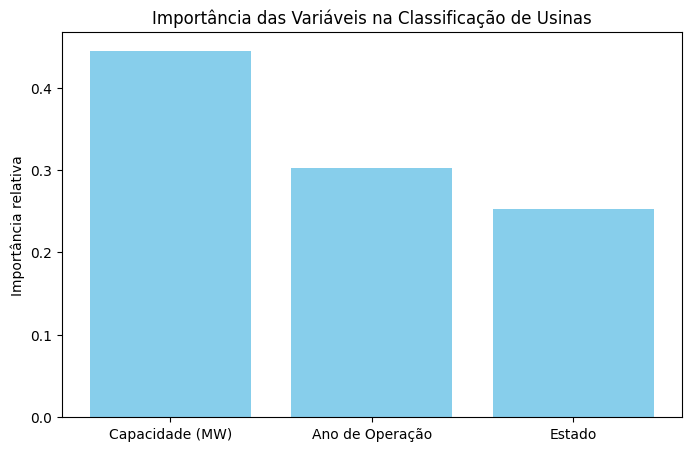

,Variável,Importância
0,Capacidade (MW),0.444851
2,Ano de Operação,0.302199
1,Estado,0.252950


In [7]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt

dados = df[["val_potenciaefetiva", "nom_estado", "ano_operacao", "nom_combustivel"]].dropna()

le_estado = LabelEncoder()
dados["estado_cod"] = le_estado.fit_transform(dados["nom_estado"])

y = dados["nom_combustivel"]

# Features (capacidade, estado, ano)
X = dados[["val_potenciaefetiva", "estado_cod", "ano_operacao"]]

# Dividir em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Treinar modelo de classificação (Random Forest)
modelo = RandomForestClassifier(n_estimators=100, random_state=42)
modelo.fit(X_train, y_train)

# Previsões
y_pred = modelo.predict(X_test)

# Avaliar acurácia
acuracia = accuracy_score(y_test, y_pred)
print(f"🔹 Acurácia do modelo: {acuracia:.2f}\n")
print("Relatório de Classificação:")
print(classification_report(y_test, y_pred))

# Importância das variáveis
importancias = pd.DataFrame({
    "Variável": ["Capacidade (MW)", "Estado", "Ano de Operação"],
    "Importância": modelo.feature_importances_
}).sort_values("Importância", ascending=False)

# Gráfico das importâncias
plt.figure(figsize=(8,5))
plt.bar(importancias["Variável"], importancias["Importância"], color="skyblue")
plt.title("Importância das Variáveis na Classificação de Usinas")
plt.ylabel("Importância relativa")
plt.show()

display(importancias)


Pergunta: Quais variáveis mais influenciam na classificação de uma usina?

As variáveis que mais influenciam na classificação foram:

- Capacidade instalada (MW) – porque certas fontes (hidrelétrica, térmica, eólica, solar) possuem escalas típicas diferentes.

- Estado – a geografia brasileira influencia a escolha da tecnologia (Nordeste = eólica, Sudeste = solar, Norte = hidráulica).

- Ano de operação – ajuda a diferenciar tecnologias emergentes (solar/eólica mais recentes) das tradicionais (hidrelétrica).

Exercício 5 – Agrupamento de Usinas por Perfil

Contexto

Usinas podem ser agrupadas de acordo com sua capacidade, região e tipo de geração, revelando padrões na matriz elétrica.

Atividade

- Selecionar variáveis numéricas (capacidade, ano de operação, latitude/longitude se disponíveis).
- Aplicar o algoritmo de clusterização K-Means.
- Visualizar os clusters em gráfico de dispersão.
- Pergunta: Cada grupo representa qual perfil de usinas (pequenas solares, grandes hidráulicas, etc.)?

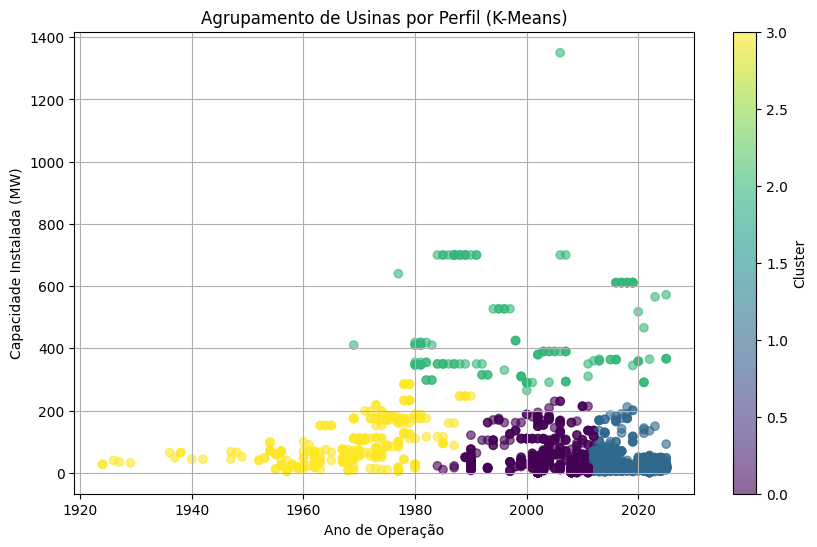

,val_potenciaefetiva,ano_operacao
Cluster,,
0,24.34,2003.46
1,20.42,2019.82
2,454.24,1999.77
3,96.31,1968.64


In [8]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Selecionar variáveis numéricas relevantes
dados_cluster = df[["val_potenciaefetiva", "ano_operacao"]].dropna()

# Normalizar os dados (importante para K-Means)
scaler = StandardScaler()
dados_norm = scaler.fit_transform(dados_cluster)

# Aplicar K-Means
kmeans = KMeans(n_clusters=4, random_state=42, n_init=10)
clusters = kmeans.fit_predict(dados_norm)

# Adicionar coluna de cluster
dados_cluster["Cluster"] = clusters

# Visualizar os clusters em gráfico de dispersão
plt.figure(figsize=(10,6))
plt.scatter(
    dados_cluster["ano_operacao"],
    dados_cluster["val_potenciaefetiva"],
    c=dados_cluster["Cluster"], cmap="viridis", alpha=0.6
)
plt.title("Agrupamento de Usinas por Perfil (K-Means)")
plt.xlabel("Ano de Operação")
plt.ylabel("Capacidade Instalada (MW)")
plt.colorbar(label="Cluster")
plt.grid(True)
plt.show()

# Analisar média de cada cluster
cluster_profile = dados_cluster.groupby("Cluster").mean().round(2)
display(cluster_profile)



Pergunta: Cada grupo representa qual perfil de usinas (pequenas solares, grandes hidráulicas, etc.)?

A matriz brasileira é composta por:

- **Usinas históricas e grandes (hidrelétricas)**, que representam a base da matriz.

- **Fontes renováveis emergentes (solar e eólica)**, mais recentes e de menor porte individual, mas em rápido crescimento.

- **Térmicas e pequenas centrais**, que complementam o sistema em regiões específicas.